<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/02_Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification problem is where you try to classify a particular object

A few types of classification problems

* Binary classification
* Multiclass classification
* Multilabel classificaiton

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000
# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
 # Check features
 X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now let's visualize it

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

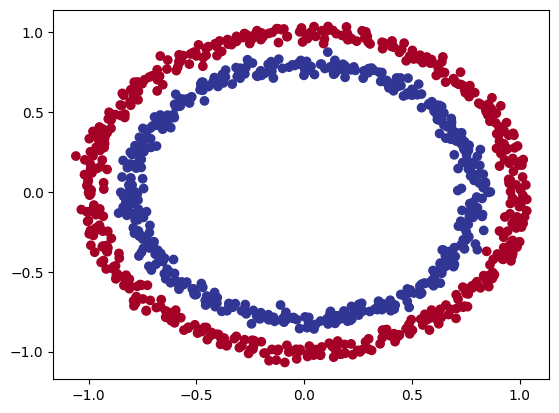

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

**Exercise**: Before pushing forward spend 10 mins playing around with TF playground building and running different neural networks.  See what happens when you change different hyper parameters

## Input and output shapes

In [7]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

## My model

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
model.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 4s 7ms/step - loss: 0.6993 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6828 - accuracy: 0.5440
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6666 - accuracy: 0.5640
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6377 - accuracy: 0.6250
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5836 - accuracy: 0.7720
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 0.4840 - accuracy: 0.9220
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.3239 - accuracy: 0.9780
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2011 - accuracy: 0.9820
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1312 - accuracy: 0.9970
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0907 - accuracy: 0.9990
Epoch 11/

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [11]:
## Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# fit the model
model_1.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 4s 3ms/step - loss: 5.3114 - accuracy: 0.4770
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 5.2270 - accuracy: 0.4740
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 5.0848 - accuracy: 0.4770
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 4.9030 - accuracy: 0.4730
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 4.8279 - accuracy: 0.4730
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 4.7673 - accuracy: 0.4710
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 4.6778 - accuracy: 0.4680
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 4.6273 - accuracy: 0.4680
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 4.6183 - accuracy: 0.4690
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 4.6017 - accuracy: 0.4700
Epoch 11/

Since we're working on a binary classification problem the model has an accuracy of around 50% which makes it seem like the model is guessing....

In [12]:
tf.random.set_seed(42)

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])

# fit the model

model_2.fit(X,y,epochs=100,verbose=0)

In [13]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932474374771118, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers, or increase the number of hidden units within a layer
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD
3. Fitting a model - Perhaps we might fit our model for more epochs(longer training)

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (This time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# finally fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [15]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5110


[0.6979897618293762, 0.5109999775886536]

Note: Whenever model is behaving strangely visualize, visualize, visualisze

To visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in trained model, features(X) and labels(Y)
* Create a mesh grid of different X values
* Make predicitions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)


In [16]:
# Let's see if the model can be used for a regression problem

tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [17]:
# Let's split our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

X_reg_train.ndim


1

We compiled our model for binary classifcation problem, but we are now working on a regression problem.  Let's change our model to suit our data

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (This time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# finally fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=(1)), # <- expand input dimensions
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 288.9872 - mae: 288.9872
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 179.1064 - mae: 179.1064
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 73.9046 - mae: 73.9046
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 62.3827 - mae: 62.3827
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 73.2713 - mae: 73.2713
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 51.1823 - mae: 51.1823
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 44.7284 - mae: 44.7284
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.7658 - mae: 43.7658
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.3843 - mae: 43.3843
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.8562 - mae: 42.8562
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


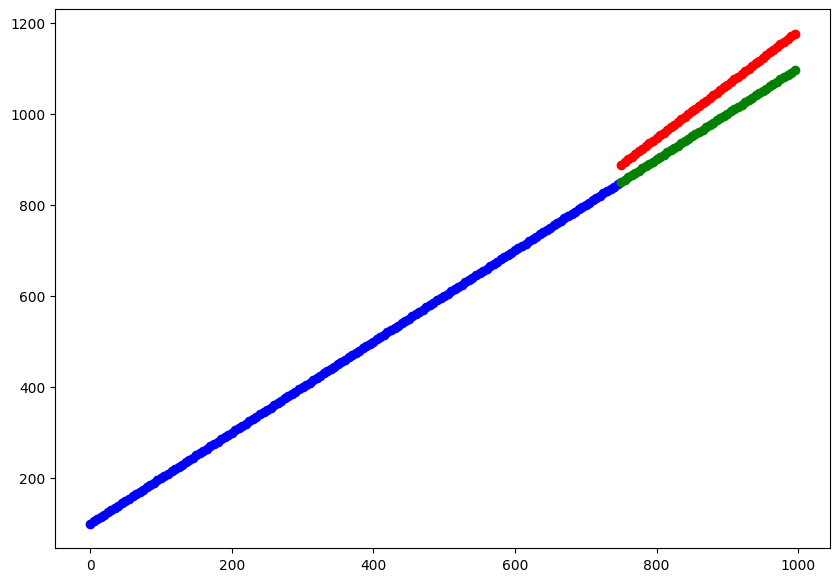

In [19]:
# Make predictions with trained model

y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test, c="g",label="Testing data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")

## The missing piece: Non-Linearity

In [20]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,tf.keras.activations.linear)
])

# Compile the model
model_4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history = model_4.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 4.3529 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.3190 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2778 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2544 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2286 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1898 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1865 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1830 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1798 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1578 - accuracy: 0.4720
Epoch 11/

Let's try and build our first neural network with non-linear activation function

In [21]:
# Set the random seed
tf.random.set_seed(42)

# Create the model with non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,tf.keras.activations.relu)
])

# Compile the model
model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history = model_5.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.8909 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8779 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8068 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7469 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7400 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7273 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7125 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6890 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6720 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6675 - accuracy: 0.4820
Epoch 11/

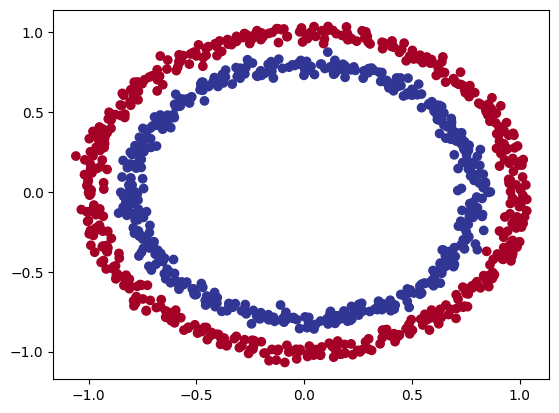

In [22]:
# Checkout data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [23]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


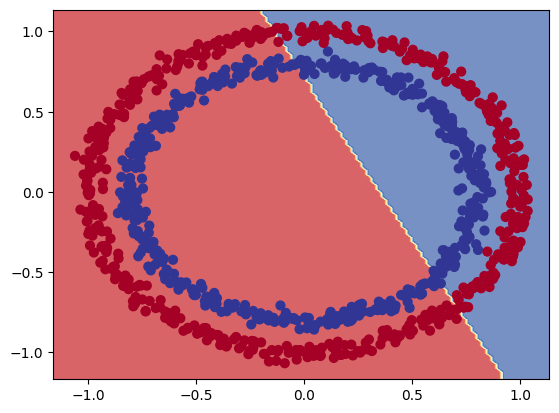

In [24]:
# check the decision boundary for latest model
plot_decision_boundary(model=model_4,X=X,y=y)

In [25]:
  x_min,x_max = X[:,0].min()-0.1, X[:,0] + 0.1
  y_min,y_max = X[:,1].min()-0.1, X[:,1] + 0.1
  x_min,x_max,y_min,y_max

(-1.1595024599098636,
 array([ 8.54246251e-01, -6.56158882e-01, -7.15391934e-01, -2.93730729e-01,
         5.42207645e-01, -3.79646368e-01,  8.63516405e-02,  8.71513274e-01,
        -6.93223397e-02, -2.14857961e-02, -5.42490416e-01,  6.69466604e-01,
        -1.77359106e-02,  8.34100038e-01,  7.00776333e-01,  2.90225707e-01,
        -8.36951846e-01,  2.07061696e-01, -7.18913619e-01, -5.42100130e-01,
         7.26827199e-01, -4.62291360e-01,  7.87333421e-02,  8.39770578e-01,
        -8.09048393e-01, -8.36994111e-01,  3.86615780e-01,  9.26260717e-01,
         3.53433397e-01,  7.57946255e-01, -2.14834779e-01, -1.23989601e-01,
         1.08443892e-01,  1.10503887e+00,  1.04841802e-02, -6.88574473e-01,
        -4.68205362e-01,  5.47646782e-01,  3.63260719e-01,  8.45020435e-01,
        -4.97118971e-01,  4.61928379e-01, -6.14242507e-01,  9.33839377e-01,
        -7.33981856e-01, -8.10860642e-01,  5.87625557e-01,  3.30736878e-01,
         8.58412791e-01, -3.12746839e-01,  5.76176622e-01,  1.3999

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


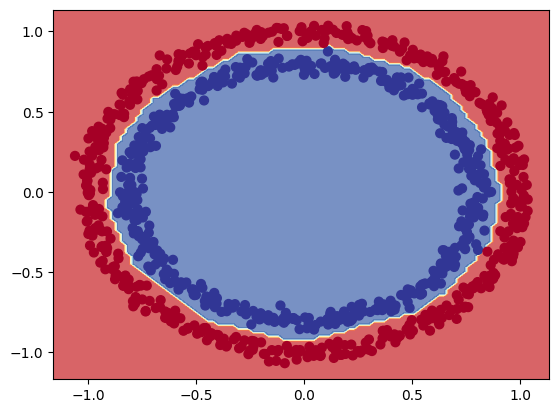

In [26]:
# Mapping my model

plot_decision_boundary(model=model,X=X,y=y)

In [27]:
# Time to replicate the multi layer neural network from TF playground in code

# set the random seed

tf.random.set_seed(42)

# Create the model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

model_6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. fit the model

history = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [28]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


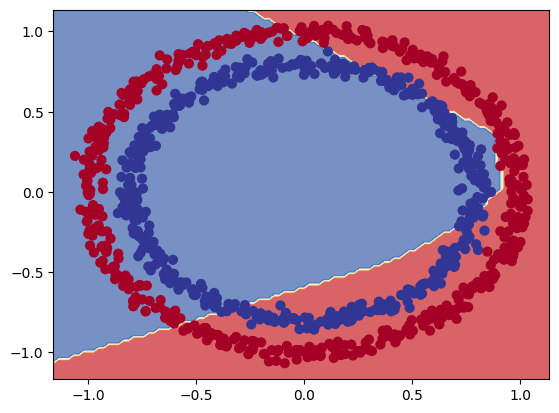

In [29]:
plot_decision_boundary(model=model_6,X=X,y=y)

In [30]:
# Time to replicate the multi layer neural network from TF playground in code

# set the random seed

tf.random.set_seed(42)

# Create the model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model

model_7.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. fit the model

history = model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.4950
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5040
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5060
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5110
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5100
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5070
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5120
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5150
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5110
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5120
Epoch 11/

In [31]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9950


[0.07188856601715088, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


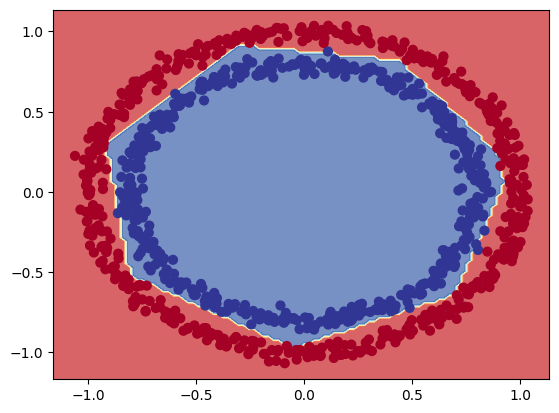

In [32]:
plot_decision_boundary(model=model_7,X=X,y=y)

The combination of **linear(straight lines) and non linear(non-straight lines) functions** is one of the key fundamentals of neural networks

Now we've discusssed the concept of linear and non-linear functions let's see them in action


In [33]:
# Create a toy tensor (similar to the data we passed into our model)

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

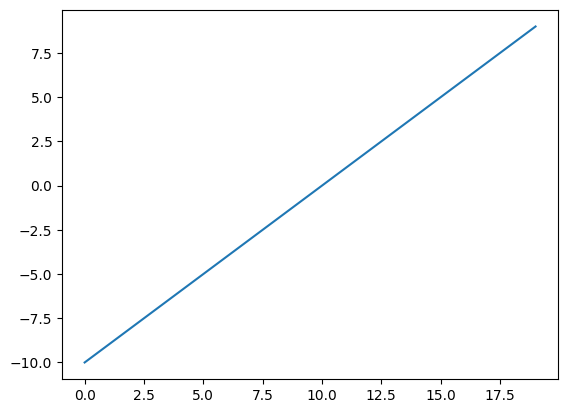

In [34]:
# Visualize our toy tensor
plt.plot(A)

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

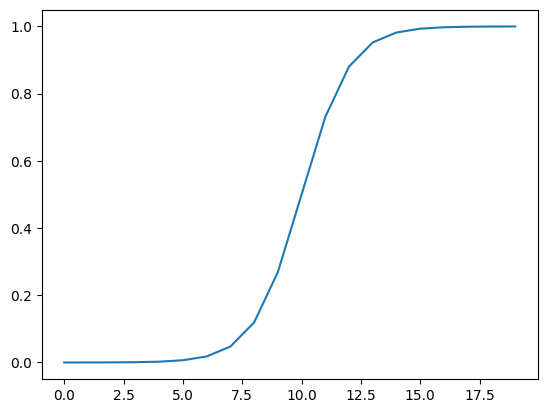

In [36]:
# Plot our toy tensor transformed by sigmoid

plt.plot(sigmoid(A))

In [37]:
# Let's do the same with relu
def relu(x):
  return tf.math.maximum(x,0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

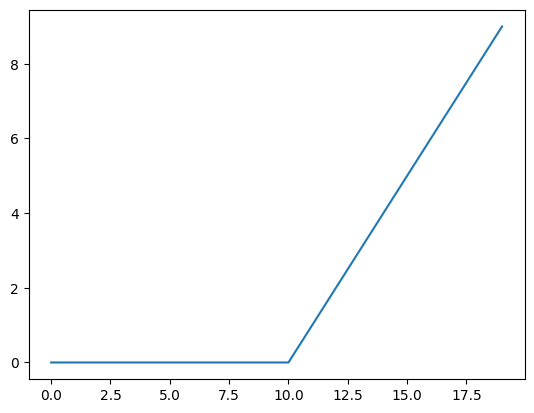

In [38]:
plt.plot(relu(A))

## Evaluating and imrpoving our classification model

So far we've been training and testing on the same dataset

However, in machine learning this is basically a sin.

So let's create a training and test set

In [39]:
# Check how many examples we have
len(X)

1000

In [40]:
X_train, y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [41]:
# Let's recreate a model to fit on training data and evaluate on test

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])

history = model_8.fit(X_train,y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7074 - accuracy: 0.4500
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4688
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5225
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5387
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5412
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5487
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.5525
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.5938
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6150
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.6338
Epoch 11/25
25/25 [

In [42]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.8450


[0.37163448333740234, 0.8450000286102295]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


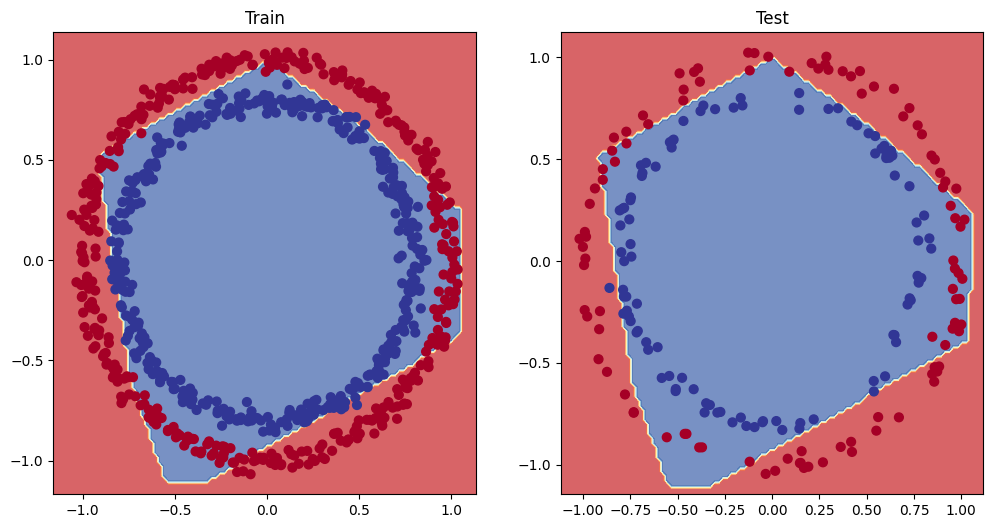

In [43]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show()

## Plot the loss (or training) curves

In [44]:
# Convert history object to dataframe

pd.DataFrame(history.history)

,loss,accuracy
0,0.707425,0.45000
1,0.694347,0.46875
2,0.687805,0.52250
3,0.680634,0.53875
4,0.679235,0.54125
5,0.672550,0.54875
6,0.665669,0.55250
7,0.658621,0.59375
8,0.641864,0.61500
9,0.628784,0.63375


Text(0.5, 1.0, 'Model_8 loss curves')

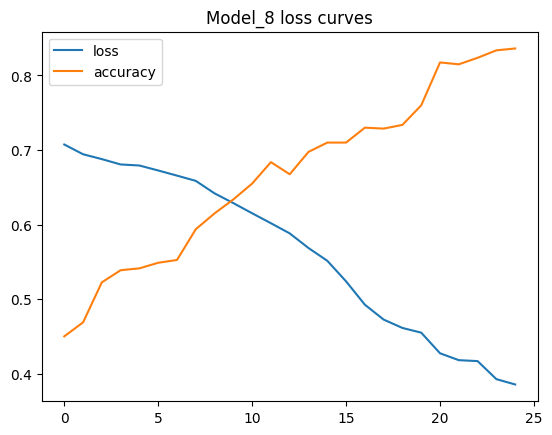

In [45]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems the loss function going down means the model is improving the predictions it's making are getting closer to the ground truth labes

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps

- A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it's training

- Another model(we could use the same one as above, but we're practicing building models here.
- A modified loss curves plot

In [46]:
tf.random.set_seed(42)

# Create a model(same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch / 20));
history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7140 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.4938 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

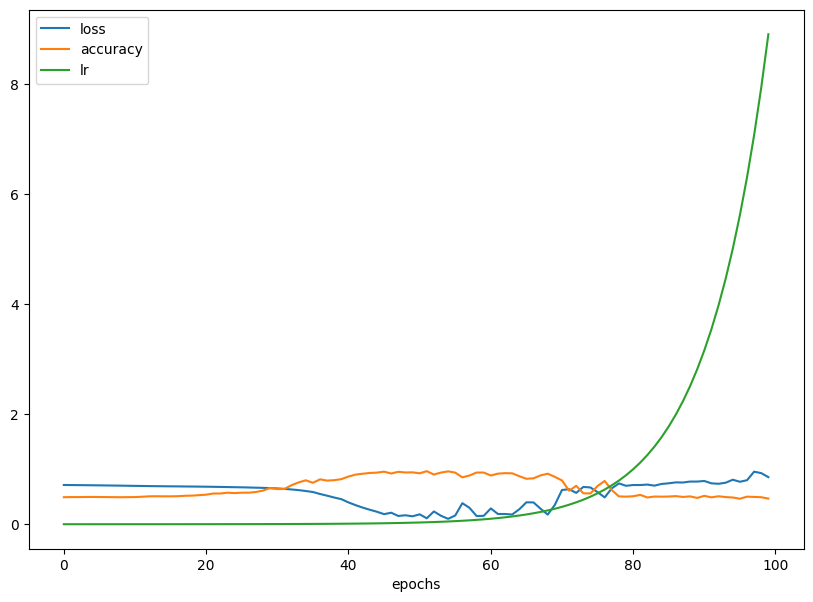

In [47]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

In [48]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 **(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [49]:
len(lrs)

100

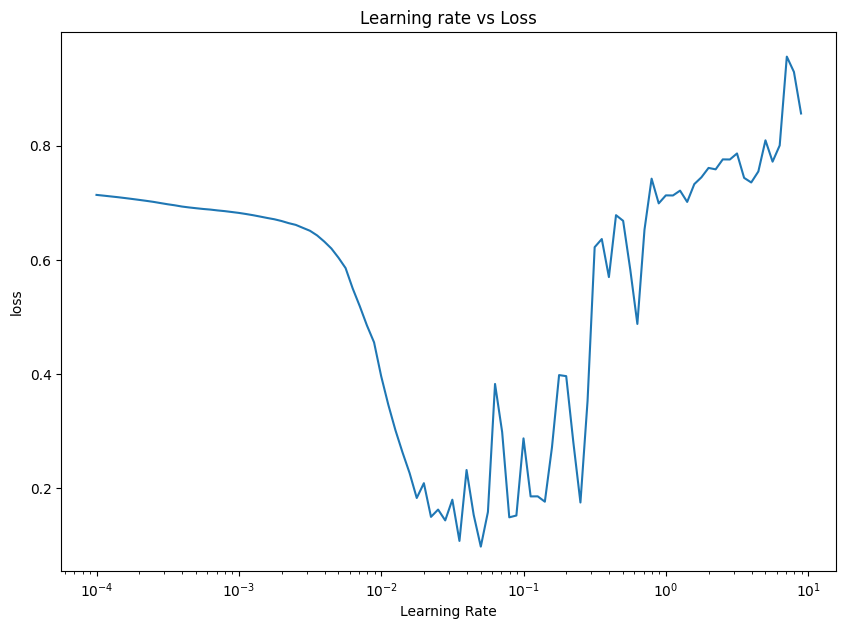

In [50]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs Loss")
plt.show()


In [51]:
# Example of other typical learning rate values are:
10 **0, 10 ** -1, 10 **-2, 10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [52]:
tf.random.set_seed(42)

# Create a model(same as model_8)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
#Create a learning rate callback
history_10 = model_10.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5487
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.5725
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.5425
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.5925
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6338 - accuracy: 0.6037
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.7025
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.8050
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8350
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.9200
Epoch 11/

In [53]:
# evaluate model 10 on testing data
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 0.9950


[0.012985935434699059, 0.9950000047683716]

In [54]:
# evaluate model 8 on testing data
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8450


[0.37163448333740234, 0.8450000286102295]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


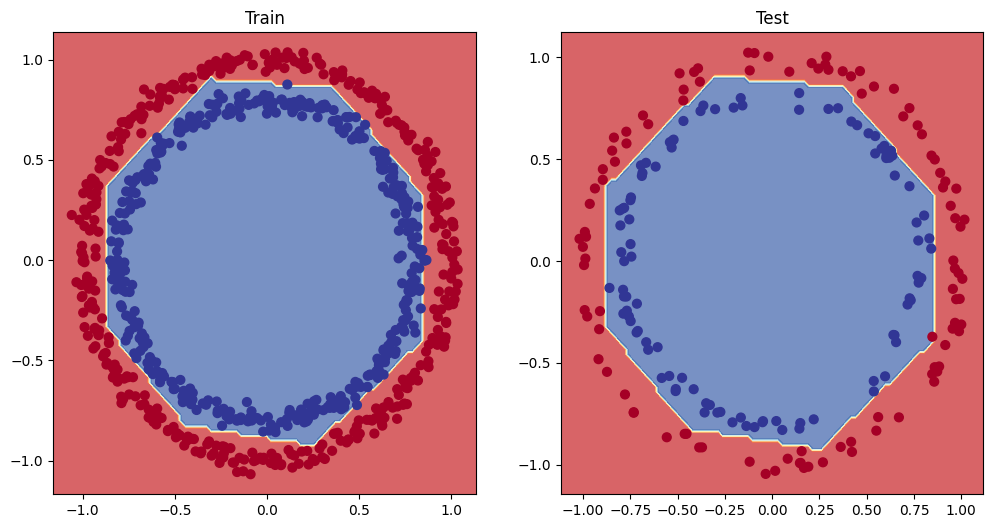

In [55]:
# plot performance
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

## How about a confusion matrix


In [56]:
from sklearn.metrics import confusion_matrix

# Make preds

y_preds = model_10.predict(X_test)

# Create a confusion matrix
#confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


In [57]:
y_preds[:10]

array([[9.8953348e-01],
       [9.9995577e-01],
       [9.9950016e-01],
       [9.9986088e-01],
       [4.3853796e-03],
       [1.5316533e-07],
       [9.9559826e-01],
       [2.7696631e-04],
       [9.9990702e-01],
       [3.3626729e-05]], dtype=float32)

Oops looks like our predictions array has come out in **prediction probability** form... the standard output from sigmoid(or softmax)

In [58]:
from sklearn.metrics import confusion_matrix

# Make preds

y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[100,   1],
       [  0,  99]])

## how about we prettify our confusion matrix?

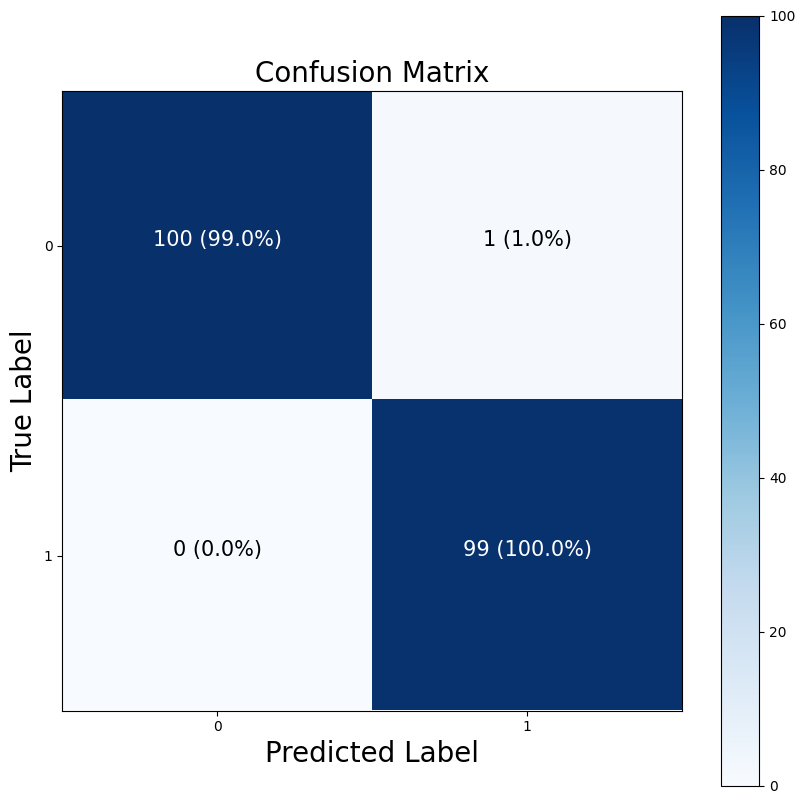

In [59]:
# Note: the matrix code we're about to write is a remix of scikitlearns confusion matrix
import itertools

figsize=(10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]  #normalize our confusion matrix

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",xlabel="Predicted Label",ylabel="True Label",
       xticks=np.arange(len(labels)),yticks=np.arange(len(labels)),xticklabels=labels,yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for diff colours
threshold = (cm.max() + cm.min()) /2

# plot text in each cell

for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",color="white"
           if cm[i,j] > threshold else "black",size=15)

In [60]:
cm_norm

array([[0.99009901, 0.00990099],
       [0.        , 1.        ]])

In [61]:
cm.shape[0]

2

## working with a larger example(multiclass classification)

When you have more than two clsses as an option, it's known as multi-class classification

* This means if you have 3 different classes, it's multi-class classification.
* It also means that if you have more than 100 classes it's also mult-class.

To prctice multi-class classification, we're going to build. neurl network to classify different items of clothing


In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us

(training_data,training_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [63]:
# Show the first training example
print(f"Training sample: \n {training_data[0]}\n")
print(f"Training label:\n{training_labels[0]}")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [64]:
# Check the shape of a single example
training_data[0].shape,training_labels[0].shape

((28, 28), ())

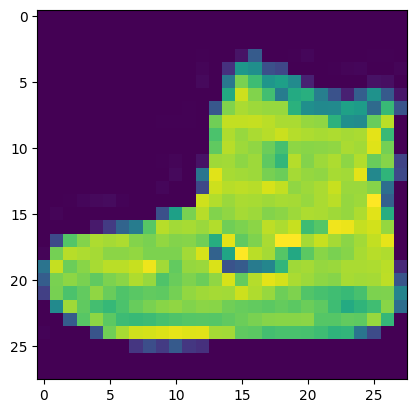

In [65]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(training_data[0])

In [66]:
# check out sample labels
training_labels[0]

9

In [67]:
# Create a small list of labels so we can index them onto our training labels so they're human readable
class_names = ["T-shirt / top","Trouser","Pullover","Dress", "Coat", "Sandal", "Shirt","Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt / top')

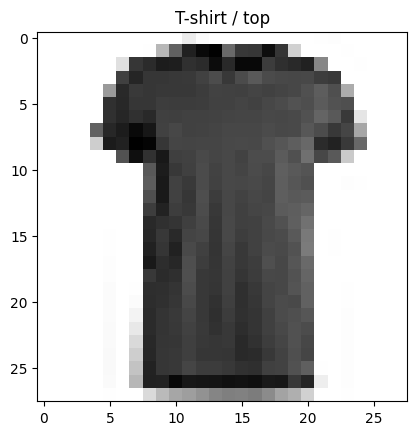

In [68]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(training_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[training_labels[index_of_choice]])

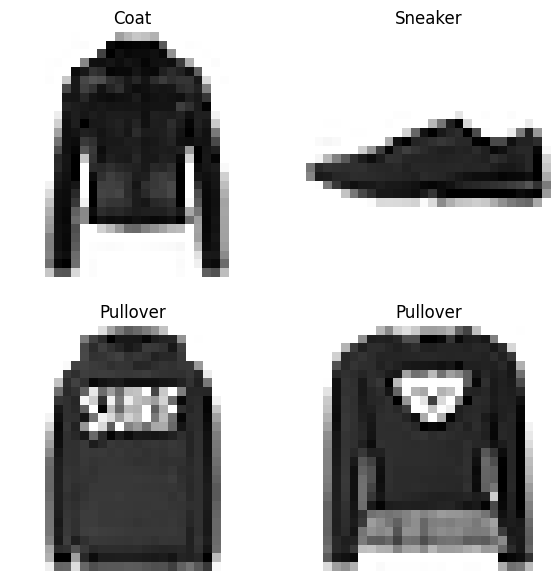

In [69]:
# Plot multiple random images of fashion mnist

import random
plt.figure(figsize=(7,7))
for i in range (4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(training_data)))
  plt.imshow(training_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[training_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our other models but we're going to tweak a few things

* Input shape = 28 * 28
* output shape = 10
* loss function = tf.keras.losses.CategoricalCrossEntropy()
* Output activation = softmax

In [70]:
training_data[0].shape

(28, 28)

In [71]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

**Note** Categorical cross entropy needs one hot encoding, to train model without one hot encoding use sparse categorical cross entropy

In [72]:
print(f"%s",flatten_model)

%s <keras.src.engine.sequential.Sequential object at 0x7f8db31c07f0>


In [73]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_11.compile(loss=tf.keras.losses.categorical_crossentropy, metrics="acc",optimizer=tf.keras.optimizers.Adam())

non_norm_history = model_11.fit(training_data,tf.one_hot(training_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5243 - acc: 0.1233 - val_loss: 2.1654 - val_acc: 0.1572
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8631 - acc: 0.2204 - val_loss: 1.7158 - val_acc: 0.2761
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6852 - acc: 0.2732 - val_loss: 1.6441 - val_acc: 0.2675
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6387 - acc: 0.2749 - val_loss: 1.6314 - val_acc: 0.2839
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6140 - acc: 0.2877 - val_loss: 1.5999 - val_acc: 0.3156
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5958 - acc: 0.2991 - val_loss: 1.6010 - val_acc: 0.3034
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5806 - acc: 0.3122 - val_loss: 1.5814 - val_acc: 0.3121
Epoch 8/10
1875/1875 [==============================] - 6s 3ms

In [74]:
# Check the model summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
training_data.min(), training_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 & 1.

In [90]:
# We can get our training data and testing data between 0 and 1 by dividing by the max value
training_data_norm = training_data / 255.0
test_data_norm = test_data / 255.0

training_data_norm.min(), training_data_norm.max()

(0.0, 1.0)

In [94]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_11.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics="acc",optimizer=tf.keras.optimizers.Adam())

norm_history = model_11.fit(training_data_norm,training_labels,epochs=10,validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1847 - acc: 0.5698 - val_loss: 0.8469 - val_acc: 0.6989
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7360 - acc: 0.7421 - val_loss: 0.6906 - val_acc: 0.7576
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6478 - acc: 0.7752 - val_loss: 0.6539 - val_acc: 0.7702
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6193 - acc: 0.7861 - val_loss: 0.6398 - val_acc: 0.7765
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6053 - acc: 0.7897 - val_loss: 0.6234 - val_acc: 0.7842
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5939 - acc: 0.7937 - val_loss: 0.6328 - val_acc: 0.7792
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5876 - acc: 0.7968 - val_loss: 0.6285 - val_acc: 0.7835
Epoch 8/10
1875/1875 [==============================] - 7s 4

In [78]:
norm_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

**Note** Neural networks tend to prefer data in numerical form as well as scaled / normalized so numbers between 0 & 1.

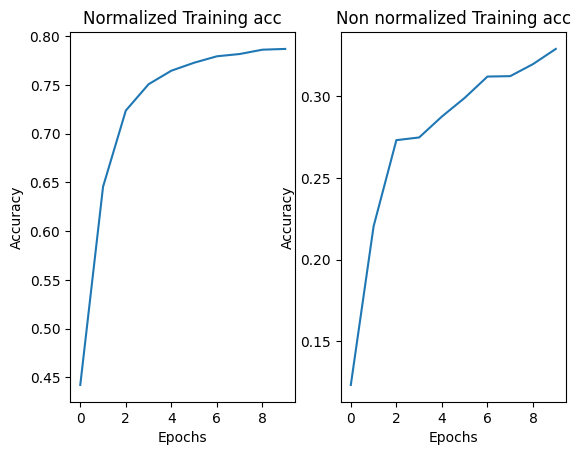

In [79]:
plt.subplot(1,2,1)
plt.title("Normalized Training acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(norm_history.history["acc"])
plt.subplot(1,2,2)
plt.title("Non normalized Training acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(non_norm_history.history["acc"])


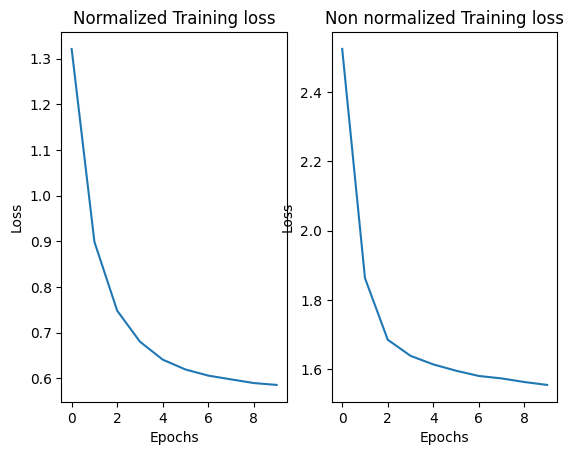

In [80]:
plt.subplot(1,2,1)
plt.title("Normalized Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(norm_history.history["loss"])
plt.subplot(1,2,2)
plt.title("Non normalized Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(non_norm_history.history["loss"])


<Axes: title={'center': 'Normalized data'}>

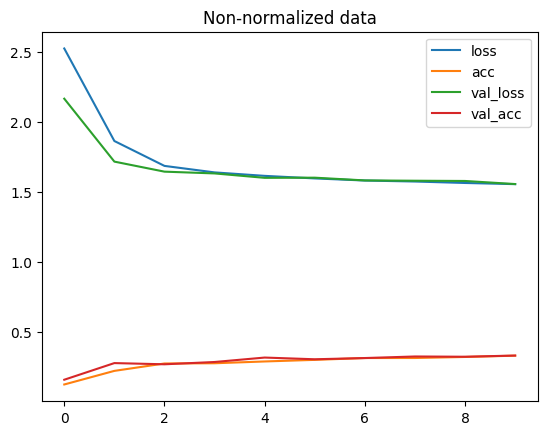

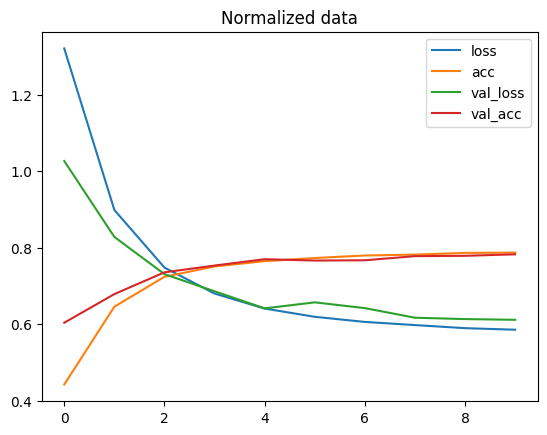

In [81]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria(eg. Same architecture, different data or same data with data with different architecture)

## Finding the  ideal learning rate

In [95]:
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

model_13.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# Create the learning rate  callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))

find_lr_history = model_13.fit(training_data_norm,training_labels,epochs=40,
                            validation_data=(test_data_norm,test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6714 - accuracy: 0.3465 - val_loss: 1.4728 - val_accuracy: 0.4008 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4154 - accuracy: 0.4103 - val_loss: 1.3750 - val_accuracy: 0.4332 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3025 - accuracy: 0.4718 - val_loss: 1.0360 - val_accuracy: 0.6440 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8486 - accuracy: 0.7096 - val_loss: 0.7371 - val_accuracy: 0.7393 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6820 - accuracy: 0.7519 - val_loss: 0.6935 - val_accuracy: 0.7450 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6375 - accuracy: 0.7662 - val_loss: 0.6535 - val_accuracy: 0.7764 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

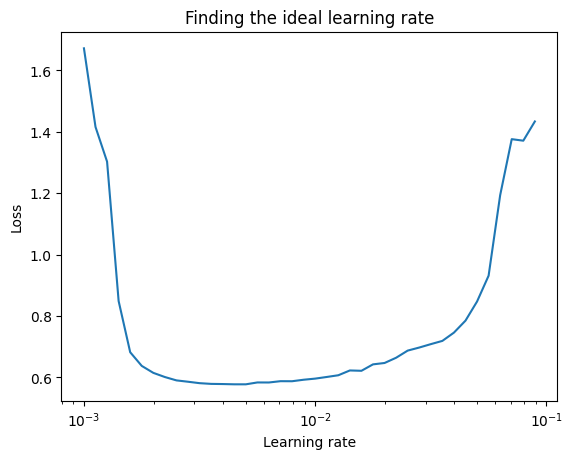

In [96]:
# plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [98]:
# let's refit a model with the ideal learning rate

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["acc"])
history_14 = model_14.fit(training_data_norm, training_labels,epochs=20, validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.1506 - acc: 0.5651 - val_loss: 0.8209 - val_acc: 0.6912
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7284 - acc: 0.7430 - val_loss: 0.6954 - val_acc: 0.7652
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6350 - acc: 0.7915 - val_loss: 0.6265 - val_acc: 0.7904
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5781 - acc: 0.8070 - val_loss: 0.5953 - val_acc: 0.8007
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5475 - acc: 0.8144 - val_loss: 0.5848 - val_acc: 0.7955
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5320 - acc: 0.8181 - val_loss: 0.6081 - val_acc: 0.7973
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5223 - acc: 0.8217 - val_loss: 0.5748 - val_acc: 0.8034
Epoch 8/20
1875/1875 [==============================] -

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:

* Evaluate its performance using other classification metrics(such as a confusion matrix)
* Assess some of its predictions through visualizations
* Improve its results by training it for longer or changing the architecture
* Save and export it for use in an application

Let's go through the top 2

In [103]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None, figsize=(10,10),textSize=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true,tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]  #normalize our confusion matrix

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # Set labels to be classees
  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",xlabel="Predicted Label",ylabel="True Label",
        xticks=np.arange(len(labels)),yticks=np.arange(len(labels)),xticklabels=labels,yticklabels=labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust the label size
  ax.yaxis.label.set_size(textSize)
  ax.xaxis.label.set_size(textSize)
  ax.title.set_size(textSize)

  # set threshold for diff colours
  threshold = (cm.max() + cm.min()) /2

  # plot text in each cell

  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",color="white"
            if cm[i,j] > threshold else "black",size=15)

In [106]:
# make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[7.3641486e-06, 9.4886069e-12, 6.5293875e-07, 1.5187226e-07,
        2.0411985e-09, 1.9568609e-01, 3.1352449e-06, 1.4333414e-01,
        3.1638760e-03, 6.5780455e-01],
       [1.3704357e-03, 8.8464676e-06, 9.2254961e-01, 1.3459066e-07,
        8.1504826e-03, 9.8639573e-33, 6.7915417e-02, 2.9173088e-30,
        5.0253161e-06, 2.8405870e-25],
       [1.8090419e-05, 9.9981004e-01, 1.1352811e-04, 1.8669034e-05,
        2.7076845e-05, 3.3104874e-36, 1.2614295e-05, 2.1672335e-34,
        1.8288324e-13, 7.7640452e-31],
       [2.0599311e-05, 9.9909794e-01, 6.4443058e-04, 5.1998868e-05,
        1.6061627e-04, 2.3479865e-32, 2.4517965e-05, 3.4271261e-29,
        1.9734893e-12, 1.8126238e-27],
       [1.0027506e-01, 7.8784197e-04, 1.4971277e-01, 3.7940480e-02,
        6.2348906e-02, 7.7166095e-13, 6.3979185e-01, 6.7967707e-15,
        9.1431541e-03, 7.5234621e-13]], dtype=float32)

**Note** remember to make predictions on the same kind of data that your model was trained on (eg: if your model was trained on normalized data, you want to make predictions on normalized data)

In [112]:
class_names

['T-shirt / top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [113]:
y_probs[0], tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([7.3641486e-06, 9.4886069e-12, 6.5293875e-07, 1.5187226e-07,
        2.0411985e-09, 1.9568609e-01, 3.1352449e-06, 1.4333414e-01,
        3.1638760e-03, 6.5780455e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [114]:
# convert all of predictions probabilities to int
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_preds)

array([[749,   6,   8,  89,   3,   0, 127,   0,  18,   0],
       [  0, 947,  11,  33,   6,   1,   1,   0,   1,   0],
       [ 19,   8, 635,  13, 194,   0, 121,   1,   9,   0],
       [ 27,  22,   8, 860,  37,   2,  31,   1,  12,   0],
       [  0,   6,  76,  31, 794,   1,  92,   0,   0,   0],
       [  0,   0,   0,   0,   0, 914,   0,  50,   9,  27],
       [153,   5,  75,  67, 144,   1, 537,   0,  18,   0],
       [  0,   0,   0,   0,   0,  46,   0, 906,   0,  48],
       [  1,   0,   3,  16,   1,  24,  71,   5, 878,   1],
       [  0,   0,   0,   0,   0,  21,   0,  52,   2, 925]])

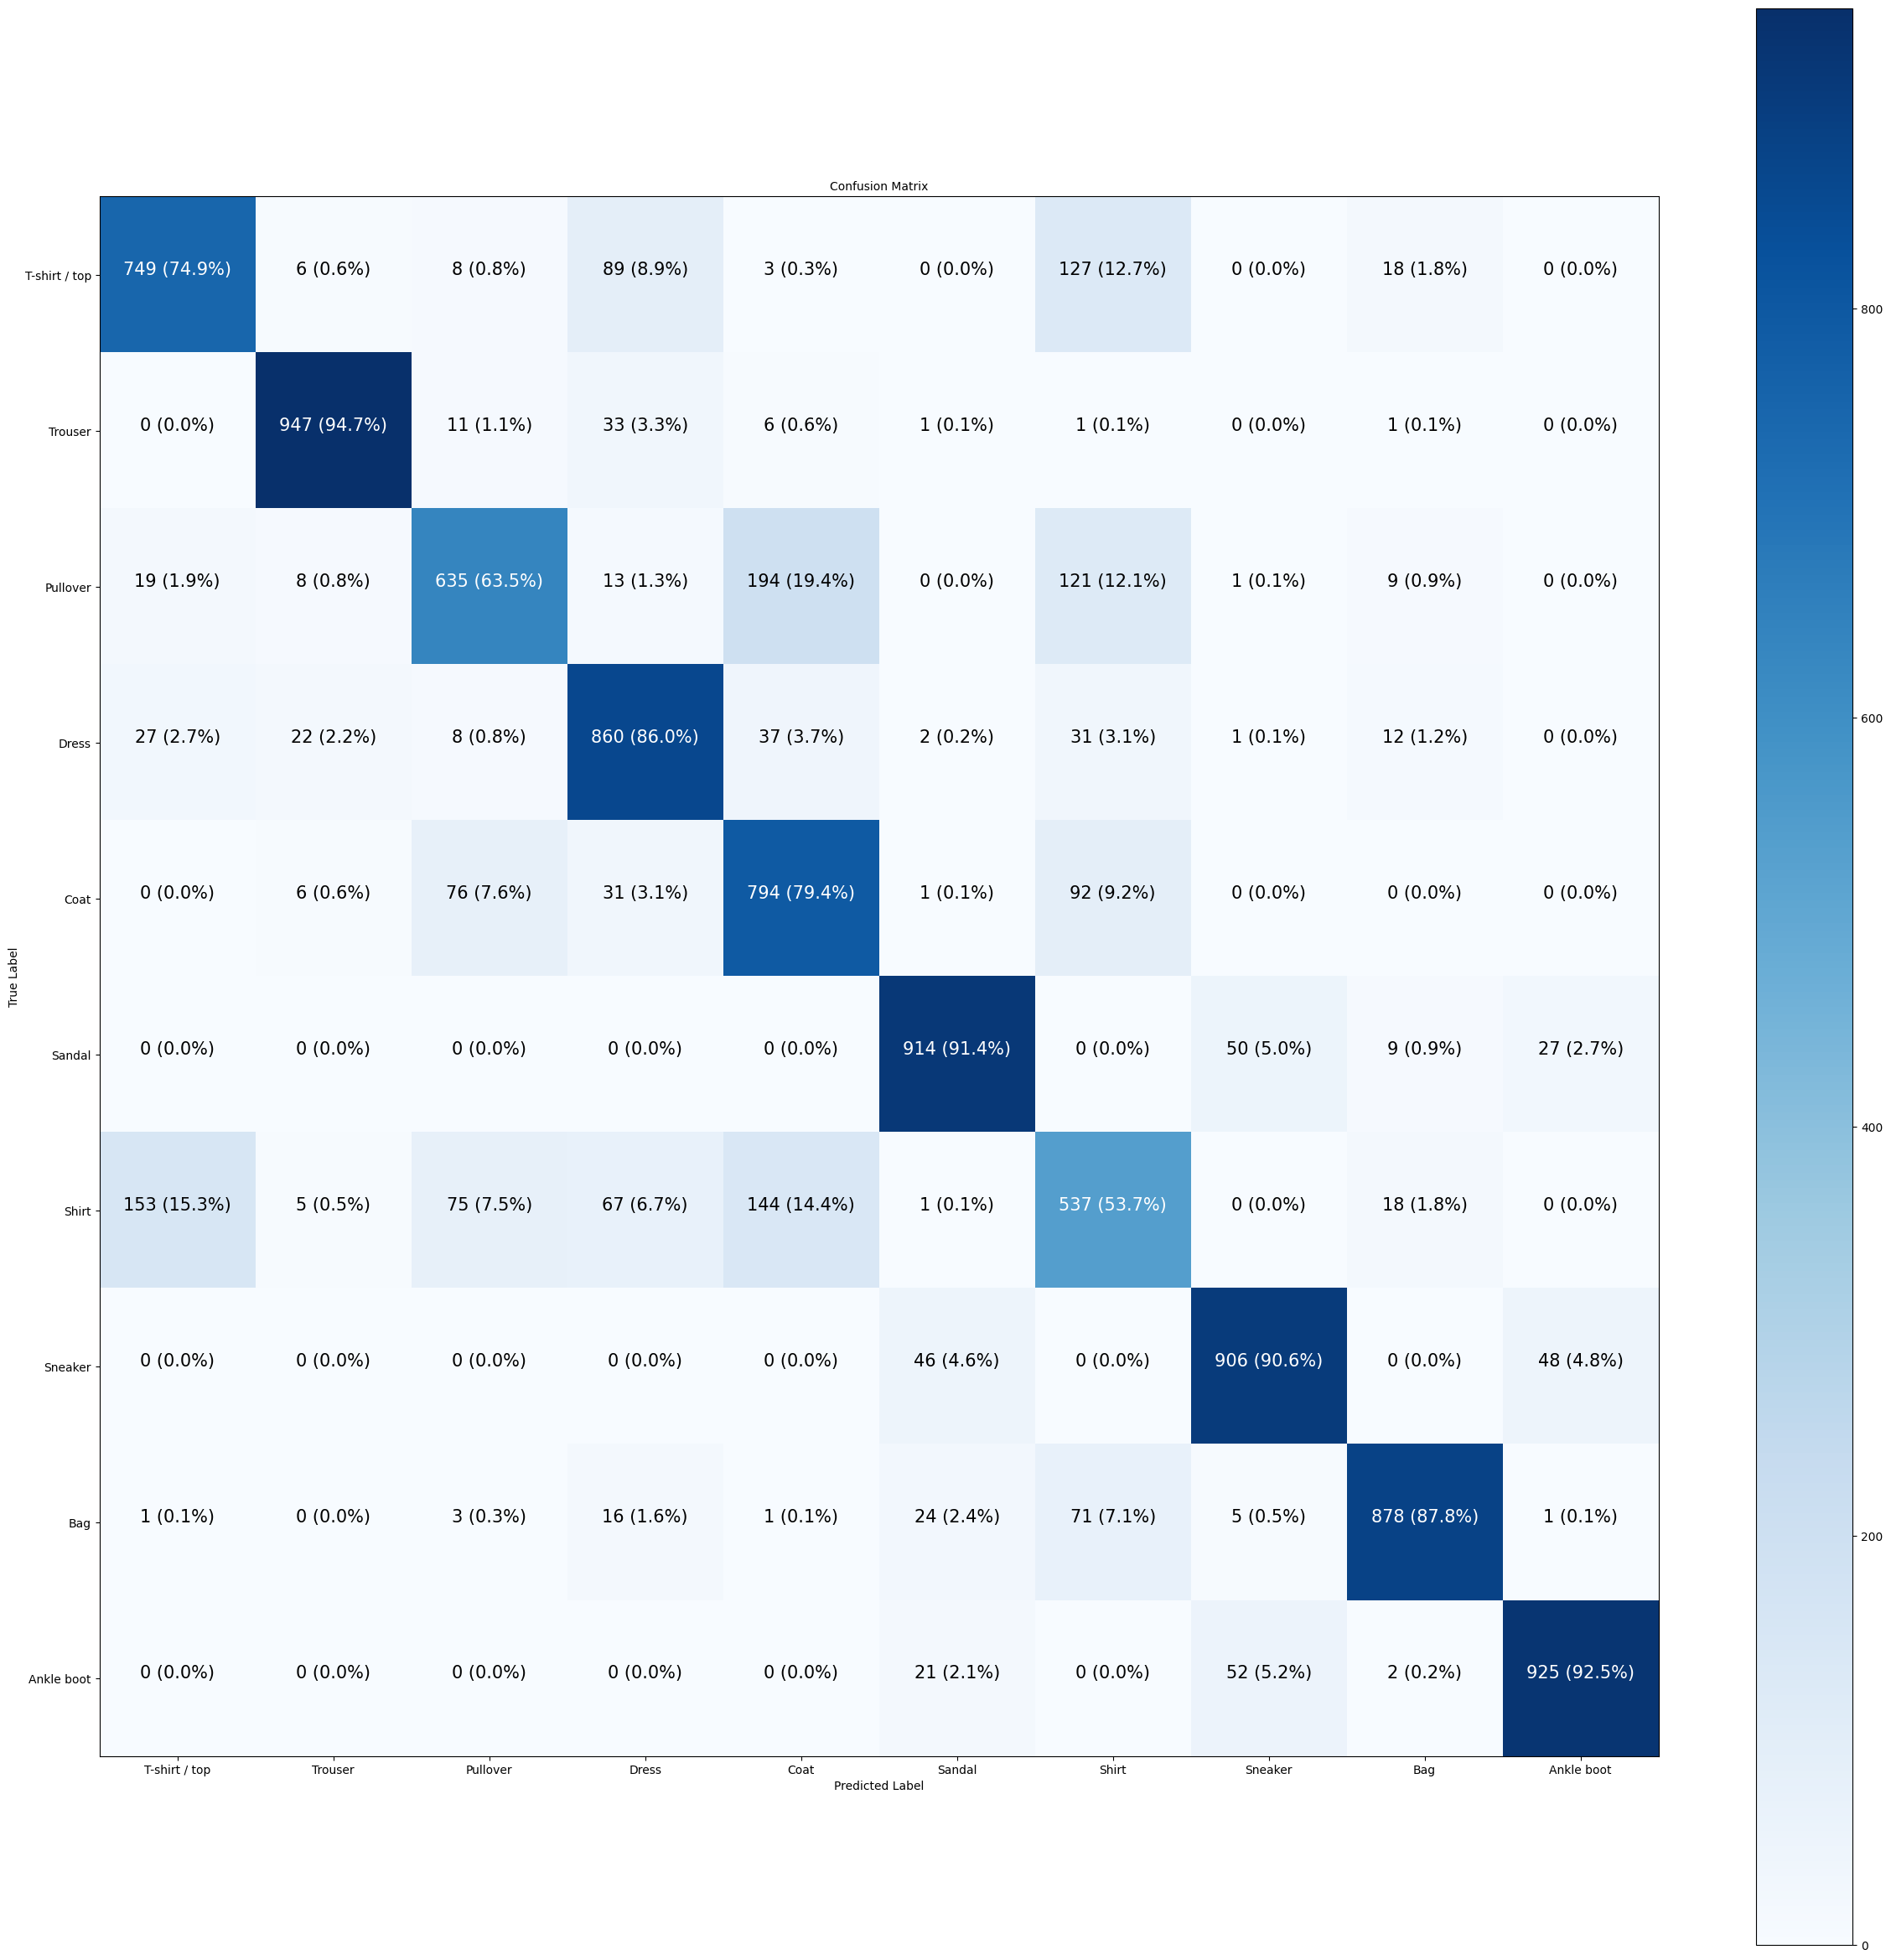

In [127]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names,figsize=(30,30),textSize=10)